Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import warnings


from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler as ROS

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

Reading Data

In [8]:
df = pd.read_csv('../../data_sets/fetal_health.csv')
df.dtypes

print(df.describe())


       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

Scaling Data

In [9]:
ss = StandardScaler()

df['fetal_health'].replace({1:0,2:1,3:2}, inplace = True)

unseen_data = df.sample(n=210)
remaining_data = df.drop(unseen_data.index)
unseen_data.reset_index(inplace=True)
remaining_data.reset_index(inplace=True)

remaining_data.drop('index',axis=1, inplace=True)
unseen_data.drop('index',axis=1, inplace=True)

scaled_data = remaining_data.copy()
scaled_data.drop('fetal_health',axis=1,inplace=True)

scaled_data = ss.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data , columns = df.drop('fetal_health',axis=1).columns)
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352042,-0.827646,-0.202387,-1.493167,-0.636346,-0.056048,-0.268778,1.526720,-0.943238,1.795360,...,-0.158654,-1.084133,-2.133621,-0.702022,-0.45920,-1.083300,0.145064,-1.189801,1.941258,1.116758
1,-0.134982,0.726269,-0.202387,0.553262,0.381666,-0.056048,-0.268778,-1.746291,0.862201,-0.532048,...,1.542012,-0.880646,1.895912,0.667359,0.99506,0.212833,0.081140,0.125081,-0.226068,-0.521610
2,-0.033560,-0.050689,-0.202387,1.235405,0.381666,-0.056048,-0.268778,-1.804738,0.862201,-0.532048,...,1.542012,-0.880646,1.895912,0.325014,0.99506,0.212833,0.017216,-0.013328,-0.190538,-0.521610
3,0.067861,-0.050689,-0.202387,1.235405,0.381666,-0.056048,-0.268778,-1.804738,1.200720,-0.532048,...,1.207032,-1.389365,0.328872,2.379085,-0.45920,-0.034049,-0.046709,-0.082532,-0.190538,1.116758
4,-0.134982,0.985255,-0.202387,1.235405,-0.636346,-0.056048,-0.268778,-1.804738,1.200720,-0.532048,...,1.207032,-1.389365,0.328872,1.694394,-0.45920,-0.034049,0.081140,-0.013328,-0.261597,1.116758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.676391,-0.827646,-0.202387,0.894334,-0.636346,-0.056048,-0.268778,1.877399,-1.281758,0.821096,...,-0.777078,1.459459,0.720632,-0.017332,-0.45920,0.953480,0.976079,0.955532,-0.581367,-0.521610
1912,0.676391,-0.568660,-0.202387,0.894334,-0.636346,-0.056048,-0.268778,1.818953,-1.056078,0.658718,...,-0.107119,0.306364,0.272906,0.667359,-0.45920,0.891760,0.848230,0.886328,-0.545837,1.116758
1913,0.676391,-0.568660,-0.202387,0.894334,-0.636346,-0.056048,-0.268778,1.877399,-1.056078,0.550467,...,-0.081351,0.306364,0.328872,0.325014,-0.45920,0.953480,0.848230,0.955532,-0.510307,1.116758
1914,0.676391,-0.568660,-0.202387,0.553262,-0.636346,-0.056048,-0.268778,1.818953,-1.056078,0.929347,...,-0.107119,0.306364,0.272906,0.667359,-0.45920,0.891760,0.784306,0.886328,-0.510307,1.116758


Training

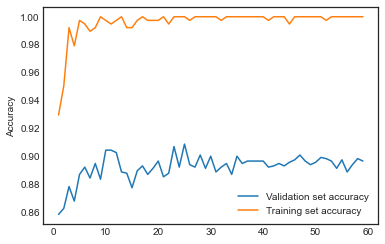

In [10]:
from sklearn.model_selection import train_test_split
target = remaining_data['fetal_health']
predictors = scaled_data.copy()

x_train, x_rest, y_train, y_rest = train_test_split(predictors,target, train_size=0.20,random_state= 42, stratify = target.values)
x_validate, x_test, y_validate, y_test = train_test_split(x_rest, y_rest, test_size=0.25, random_state=45)

rand = np.arange(1,60)
train_accuracy = np.empty(len(rand))
test_accuracy = np.empty(len(rand))

for i, k in enumerate(rand):
    rfc = RandomForestClassifier(k)
    
    rfc.fit(x_train, y_train)

    train_accuracy[i] = rfc.score(x_train, y_train)
    test_accuracy[i] = rfc.score(x_validate, y_validate)

plt.plot(rand, test_accuracy)
plt.plot(rand ,train_accuracy)

plt.legend(['Validation set accuracy','Training set accuracy'])
plt.ylabel('Accuracy')
plt.show()

warnings.filterwarnings('ignore')
warnings.warn('Delftstack')

In [11]:
#Split for validation --> train, val, test = 80/15/5

x_train, x_validation, y_train, y_validation = train_test_split(df.drop('fetal_health', axis=1), df['fetal_health'], test_size=0.20, random_state=33)

x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1700, 21)
y_train shape is: (1700,) 

x_val shape is: (319, 21)
y_val shape is: (319,) 

x_test shape is: (107, 21)
y_test shape is: (107,)


RFC Model

Training accuracy: 0.9994117647058823
RFC scores
0.9252336448598131
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        83
         1.0       0.85      0.65      0.73        17
         2.0       0.86      0.86      0.86         7

    accuracy                           0.93       107
   macro avg       0.88      0.83      0.85       107
weighted avg       0.92      0.93      0.92       107

Confusion matrix:
[[82  1  0]
 [ 5 11  1]
 [ 0  1  6]]


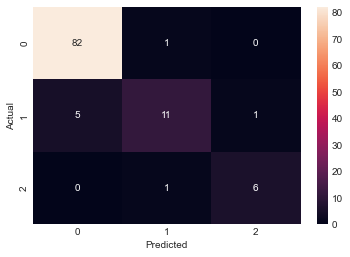

In [12]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {'RFC' : RandomForestClassifier(40)}
for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print('Training accuracy:',train_acc)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    confusion = sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
    confusion.set_xlabel("Predicted")
    confusion.set_ylabel("Actual")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)